                        date      open      high       low     close  \
0  2000-01-03 00:00:00-05:00  4.075000  4.478125  3.952344  4.468750   
1  2000-01-04 00:00:00-05:00  4.268750  4.575000  4.087500  4.096875   
2  2000-01-05 00:00:00-05:00  3.525000  3.756250  3.400000  3.487500   
3  2000-01-06 00:00:00-05:00  3.565625  3.634375  3.200000  3.278125   
4  2000-01-07 00:00:00-05:00  3.350000  3.525000  3.309375  3.478125   

   adj_close     volume  
0   4.468750  322352000  
1   4.096875  349748000  
2   3.487500  769148000  
3   3.278125  375040000  
4   3.478125  210108000  


C:\Users\Hi\AppData\Local\Temp\ipykernel_13372\818412099.py:11: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])


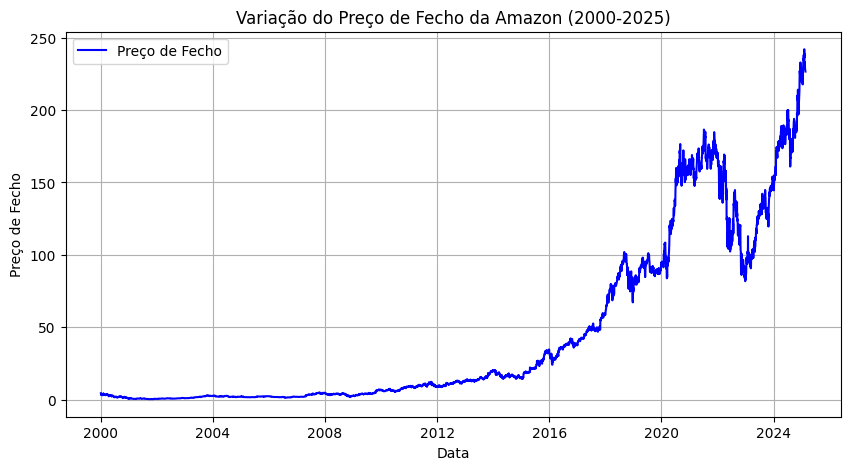

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#a)
# Definir o caminho do arquivo
caminho_arquivo = r"C:\Users\Hi\Desktop\0. Cursos\Python\FundamentosPython_VSC\groovy.libra-1\10793_AvaliacaoFinal\Amazon stock data 2000-2025.csv"

# Carregar o dataset
df = pd.read_csv(caminho_arquivo)

# Converter a coluna 'date' para formato datetime
df['date'] = pd.to_datetime(df['date'])

# Exibir as primeiras linhas do dataset
print(df.head())

# Criar um gráfico da variação dos preços de fechamento ao longo do tempo
plt.figure(figsize=(10,5))
plt.plot(df['date'], df['close'], label='Preço de Fecho', color='blue')
plt.xlabel('Data')
plt.ylabel('Preço de Fecho')
plt.title('Variação do Preço de Fecho da Amazon (2000-2025)')
plt.legend()
plt.grid()
plt.show()

                 date      open      high       low     close  adj_close  \
0 2000-01-03 05:00:00  4.075000  4.478125  3.952344  4.468750   4.468750   
1 2000-01-04 05:00:00  4.268750  4.575000  4.087500  4.096875   4.096875   
2 2000-01-05 05:00:00  3.525000  3.756250  3.400000  3.487500   3.487500   
3 2000-01-06 05:00:00  3.565625  3.634375  3.200000  3.278125   3.278125   
4 2000-01-07 05:00:00  3.350000  3.525000  3.309375  3.478125   3.478125   

      volume  
0  322352000  
1  349748000  
2  769148000  
3  375040000  
4  210108000  


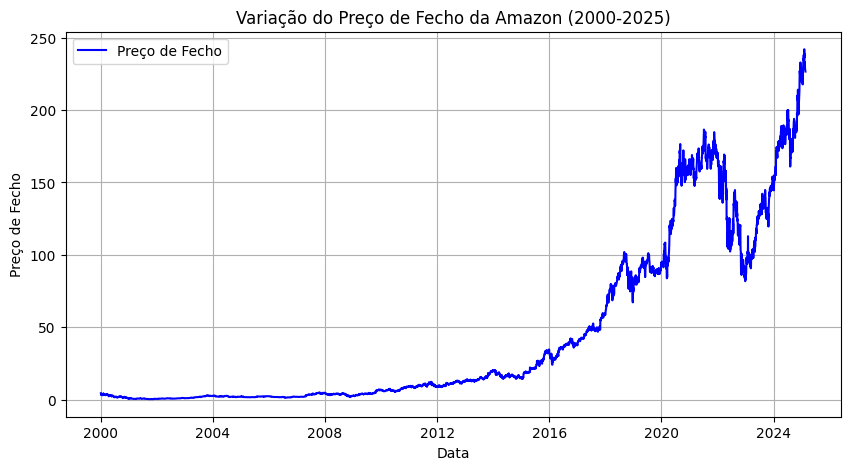

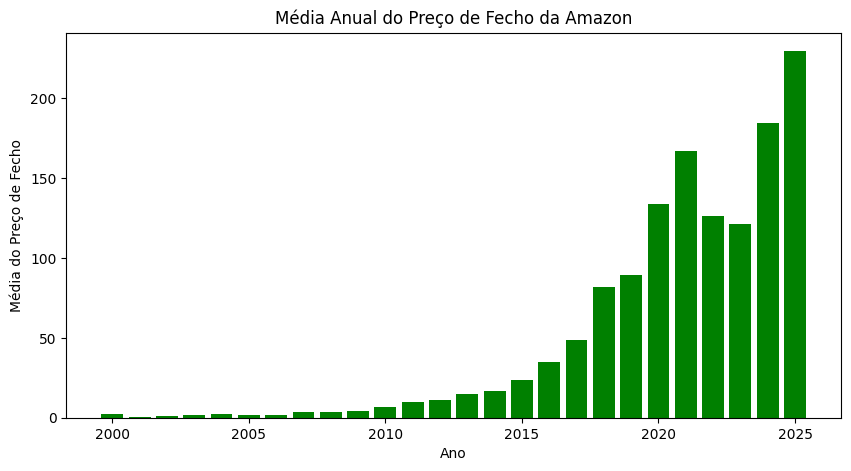

Estatísticas de 2020:
                                date        open        high         low  \
count                            253  253.000000  253.000000  253.000000   
mean   2020-07-02 17:03:19.209485824  134.050210  135.847069  132.113093   
min              2020-01-02 05:00:00   82.075500   87.972504   81.301498   
25%              2020-04-02 04:00:00  107.107498  108.303497  106.205498   
50%              2020-07-02 04:00:00  145.324997  147.778000  143.550003   
75%              2020-10-01 04:00:00  158.999496  160.100006  156.524506   
max              2020-12-31 05:00:00  177.350006  177.612503  174.334503   
std                              NaN   27.558468   27.714571   26.979942   

            close   adj_close        volume  variacao_diaria     ano  
count  253.000000  253.000000  2.530000e+02       253.000000   253.0  
mean   134.042755  134.042755  9.861982e+07         0.278476  2020.0  
min     83.830498   83.830498  2.903800e+07        -9.397995  2020.0  
25%    10

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir o caminho do arquivo
caminho_arquivo = r"C:\Users\Hi\Desktop\0. Cursos\Python\FundamentosPython_VSC\groovy.libra-1\10793_AvaliacaoFinal\Amazon stock data 2000-2025.csv"

# Carregar o dataset
df = pd.read_csv(caminho_arquivo)

# Converter a coluna 'date' para formato datetime e ajustar fuso horário
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)
df['date'] = df['date'].dt.tz_convert(None)  # Remove fuso horário

# Exibir as primeiras linhas do dataset
print(df.head())

# Processamento de dados
# Criar uma nova coluna com a variação diária do preço de fecho
df['variacao_diaria'] = df['close'].diff()

# Agrupar por ano e calcular a média dos preços de fecho
df['ano'] = df['date'].dt.year
media_anual = df.groupby('ano')['close'].mean()

# Filtrar apenas os dados do ano 2020
df_2020 = df[df['ano'] == 2020]

# Visualização de dados
plt.figure(figsize=(10,5))
plt.plot(df['date'], df['close'], label='Preço de Fecho', color='blue')
plt.xlabel('Data')
plt.ylabel('Preço de Fecho')
plt.title('Variação do Preço de Fecho da Amazon (2000-2025)')
plt.legend()
plt.grid()
plt.show()

# Gráfico da média anual dos preços de fecho
plt.figure(figsize=(10,5))
plt.bar(media_anual.index, media_anual.values, color='green')
plt.xlabel('Ano')
plt.ylabel('Média do Preço de Fecho')
plt.title('Média Anual do Preço de Fecho da Amazon')
plt.show()

# Exibir algumas estatísticas sobre os dados de 2020
print("Estatísticas de 2020:")
print(df_2020.describe())